<a href="https://colab.research.google.com/github/astrovishalthakur/MachineLearning/blob/main/Ensemble/Boosting/GradientBoostGradientBoostingMathFormulas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = [{"R&D Spend": 165,
        "Administration": 137, 
        "Marketing Spend": 472,
        "Profit": 192},
        {"R&D Spend": 101,
        "Administration": 92, 
        "Marketing Spend": 250,
        "Profit": 144},
        {"R&D Spend": 29,
        "Administration": 127, 
        "Marketing Spend": 201,
        "Profit": 91}]

In [3]:
df = pd.DataFrame(data)

In [4]:
df

,R&D Spend,Administration,Marketing Spend,Profit
0,165,137,472,192
1,101,92,250,144
2,29,127,201,91


In [5]:
df["f0(x)"] = df["Profit"].mean()

In [6]:
df

,R&D Spend,Administration,Marketing Spend,Profit,f0(x)
0,165,137,472,192,142.333333
1,101,92,250,144,142.333333
2,29,127,201,91,142.333333


In [9]:
df["ri1"] = df.Profit - df["f0(x)"]

In [10]:
df

,R&D Spend,Administration,Marketing Spend,Profit,f0(x),ri1
0,165,137,472,192,142.333333,49.666667
1,101,92,250,144,142.333333,1.666667
2,29,127,201,91,142.333333,-51.333333


In [11]:
from sklearn.tree import DecisionTreeRegressor
dt1 = DecisionTreeRegressor(max_depth = 1) # we are putting max_depth 1 because data is small, generally we put it 8 to 32

In [12]:
dt1.fit(df.iloc[:, 0:3].values, df["ri1"].values)

DecisionTreeRegressor(max_depth=1)

[Text(0.5, 0.75, 'X[0] <= 65.0\nsquared_error = 1701.556\nsamples = 3\nvalue = -0.0'),
 Text(0.25, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = -51.333'),
 Text(0.75, 0.25, 'squared_error = 576.0\nsamples = 2\nvalue = 25.667')]

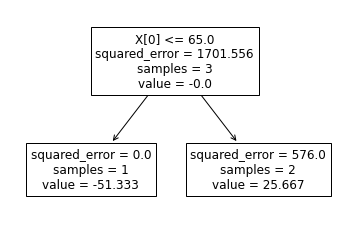

In [13]:
from sklearn.tree import plot_tree
plot_tree(dt1)

# Gradient Boosting Maths.



## 1. Initialize 
#### $$f_0(x) = arg min_\gamma\:\sum_{i=1}^{N}L(y_i, \gamma)$$
## 2. For m = 1 to M

  #### (a). For i = 1, 2, .....N, compute:
  $$r_{im} = - \Bigg[\frac{\delta L(y_i, f(x_i))}{\delta f(x_i)}\Bigg]_{f=f_{m-1}}$$
  #### (b). Fit a regression tree to the targets r<sub>im</sub> giving terminal regions R<sub>jm</sub> , j=1, 2,....,J<sub>m</sub>
  #### (c). For j = 1, 2,...., J<sub>m</sub> compute
$$\gamma_{jm} = argmin_{\gamma} \sum_{x\in R_{jm}}L(y_i, f_{m-1}(x_i) + \gamma)$$
#### (d). Update 
$$f_m(x) = f_{m-1}(x) + \sum_{j=1}^{J_m}\gamma I\:(x\in R_{jm})$$
## 3. Output
$$\hat{f}(x) = f_M(x)$$